# Neural Network 
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
- 주요 hyperparameter : hidden_layer_sizes (default=(100,)) 
    - 튜플 내 각 값이 각각의 레이어에서의 히든 노드 수를 나타냄
    - 튜플 내 값이 한개이면 히든 레이어가 한개, 두개이면, 레이어가 두개, ..
    - 첫번째 값이 100이면, 첫번째 히든 레이어의 노드 수가 100개, ... 
- 기타 hyperparameter : 
    - activation : 히든레이어의 액티베이션 
        - Note : output activation function 은 데이터에 맞추어서 자동으로 설정해준다!
    - 그 외 optimizer 와 관련된 hyperparmeters

  
## Image Classification

## 1. Handwritten Digit Recognition
### *  Data : MNIST Dataset
- MNIST는 image classification model의 성능을 평가하는 데 주로 활용되는 데이터셋으로, 손으로 쓰여진 숫자들의 이미지 70,000개로 구성됨
- 일반적으로 이 중, 60,000개를 training set으로, 나머지 10,000개를 test set으로 활용
- 각 데이터는 28 * 28 = 784개의 픽셀의 명암을 0 ~ 255 사이의 값으로 표현한 784개의 feature와 0~9 사이의 숫자로 표현되는 target을 포함


   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml


In [3]:
import sklearn
sklearn.__version__

'1.2.2'

In [4]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
# use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [6]:
im = np.array(X.loc[1,:]).reshape(28,28)

In [7]:
im = np.array(X.loc[y=='8',:])[2,:].reshape(28,28)

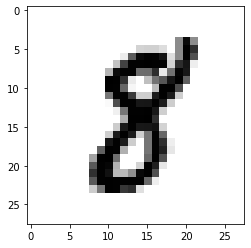

In [8]:
plt.imshow(im, cmap="binary")

In [9]:
X.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [11]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50, ), 
                    solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)
clf.fit(X_train, y_train)

Iteration 1, loss = 88770.42594147
Iteration 2, loss = 94144.72785948
Iteration 3, loss = 94116.48942606
Iteration 4, loss = 94088.25915097
Iteration 5, loss = 94060.03773325
Iteration 6, loss = 94031.82434269
Iteration 7, loss = 94003.61939577
Iteration 8, loss = 93975.42334401
Iteration 9, loss = 93947.23547037
Iteration 10, loss = 93919.05614157
Iteration 11, loss = 93890.88523832
Iteration 12, loss = 93862.72290864
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, random_state=1,
              solver='sgd', verbose=10)

In [12]:
from sklearn.metrics import accuracy_score

y_train_hat= clf.predict(X_train)
y_test_hat = clf.predict(X_test)
print(accuracy_score(y_train, y_train_hat))
print(accuracy_score(y_test, y_test_hat))

0.11236666666666667
0.1135


## Required Preprocessing : Scaling
- NN은 data scaling 을 필요로 한다

In [13]:
X = X / 255. # minmax scaler
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [14]:
clf = MLPClassifier(hidden_layer_sizes=(50, ),
                    solver='sgd', verbose=10, random_state=1, learning_rate_init=.1,
                   tol=0.000010)
clf.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Iteration 11, loss = 0.04082169
Iteration 12, loss = 0.03828222
Iteration 13, loss = 0.03557957
Iteration 14, loss = 0.03054891
Iteration 15, loss = 0.02924761
Iteration 16, loss = 0.02610471
Iteration 17, loss = 0.02363894
Iteration 18, loss = 0.02208186
Iteration 19, loss = 0.01932900
Iteration 20, loss = 0.01830387
Iteration 21, loss = 0.01639227
Iteration 22, loss = 0.01392950
Iteration 23, loss = 0.01270193
Iteration 24, loss = 0.01234102
Iteration 25, loss = 0.01081313
Iteration 26, loss = 0.01028644
Iteration 27, loss = 0.00896707
Iteration 28, loss = 0.00744908
Iteration 29, loss = 0.00707946
Iteration 30, loss = 0.00573869
Iteration 31, loss = 0.00499554
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, random_state=1,
              solver='sgd', tol=1e-05, verbose=10)

In [15]:
clf.out_activation_

'softmax'

In [16]:
from sklearn.metrics import accuracy_score

y_train_hat= clf.predict(X_train)
y_test_hat = clf.predict(X_test)
print(accuracy_score(y_train, y_train_hat))
print(accuracy_score(y_test, y_test_hat))

1.0
0.9733


In [17]:
X_test.loc[(y_test_hat != y_test)]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
60061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X_test.loc[(y_test_hat != y_test)].iloc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 60061, Length: 784, dtype: float64

In [19]:
im = np.array(X_test.loc[(y_test_hat != y_test)].iloc[1]).reshape(28,28) # 9

In [20]:
y_test_hat[(y_test_hat != y_test)]

array(['2', '9', '9', '4', '2', '2', '7', '3', '7', '0', '3', '0', '3',
       '2', '8', '3', '1', '3', '4', '2', '9', '3', '9', '7', '2', '0',
       '3', '9', '5', '1', '2', '3', '6', '8', '6', '1', '5', '4', '2',
       '4', '9', '2', '1', '4', '3', '7', '5', '2', '8', '3', '3', '3',
       '1', '8', '9', '7', '2', '3', '8', '9', '7', '6', '7', '0', '1',
       '2', '8', '2', '3', '4', '2', '0', '9', '3', '5', '0', '9', '5',
       '9', '9', '7', '0', '1', '2', '8', '0', '9', '8', '0', '5', '2',
       '3', '1', '8', '7', '0', '5', '6', '0', '1', '4', '8', '4', '9',
       '3', '0', '3', '2', '7', '9', '5', '5', '8', '0', '2', '4', '9',
       '2', '0', '5', '9', '2', '8', '9', '8', '1', '0', '7', '1', '4',
       '2', '0', '5', '5', '3', '4', '3', '3', '8', '6', '8', '3', '3',
       '6', '1', '6', '2', '2', '5', '7', '5', '3', '9', '8', '9', '7',
       '8', '8', '5', '3', '4', '3', '2', '3', '5', '4', '6', '4', '3',
       '4', '7', '6', '8', '0', '4', '9', '6', '4', '4', '5', '4

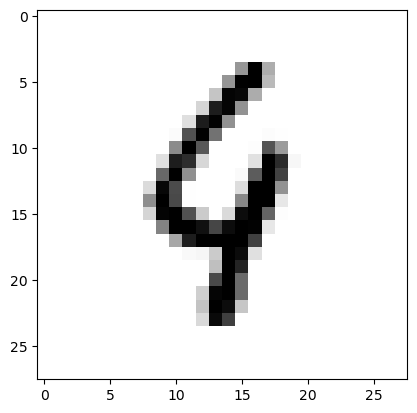

In [21]:
plt.imshow(im, cmap="binary") # 4